# Grebena regresija

Kod linearne regresije, pri rešavanju sistema $A\beta = Y$ metodom najmanjih kvadrata, gde se minimizuje vrednost izraza $||Y - \beta A||_2^2$ i čije je rešenje dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$, može se dogoditi da matrica $A^{T}A$ nije invertibilina ili loše uslovljena. Da bi se ovo nadomestilo, umesto pomenute minimizacije, vrši se minimizacija $||Y - \beta A||_2^2 + \alpha ||\beta||_2^2$, za pogodno izabran koeficijent $\alpha$. Umesto linearne, tada se govori o grebenoj regresiji, a izraz $\alpha ||\beta||_2^2$ se naziva regularizacioni element.

**1.** Na osnovu statistika o performansama bejzbol igrača, predvideti visine njihovih plata. Svi relevantni podaci se nalaze u fajlu *hitters.csv*.

**Rešenje.** Najpre učitajmo podatke i izvucimo osnovne informacije o njima.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection

In [2]:
data = pd.read_csv('data/hitters.csv')
data.shape

(322, 21)

In [3]:
data.head()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data.tail()

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A
321,-Willie Wilson,631,170,9,77,44,31,11,4908,1457,...,775,357,249,A,W,408,4,3,1000.0,A


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [6]:
np.sum(data[data.columns].isnull(), axis=0)

Player        0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Zaključujemo da postoji 322 unosa i 21 kolona. Od toga, jedino kod plata bejzbol igrača imamo neke nedostajuće vrednosti. Pošto nam takvi unosi nisu relevantni, obrisaćemo ih (ukupno ima takvih 59 unosa).

In [7]:
data = data.dropna()
print('Shape:', data.shape, '\n')
data.info()

Shape: (263, 21) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    floa

Sada nam je preostalo 263 unosa, bez nedostajućih vrednosti. Kolona *Salary* je vrednost koju tražimo. Za vektor nezavisnih promenljivih, pored kolone *Salary*, potrebno je odbaciti sve one kolone koje nemaju numeričku vrednost koja je od značaja za visinu plate. Među tim vrednostima su *Player*, *League*, *Division* i *NewLeague*.

In [8]:
X = data.drop(['Player', 'League', 'Division', 'NewLeague', 'Salary'], axis=1)
X.shape

(263, 16)

In [9]:
Y = data['Salary']
Y.shape

(263,)

Vektor nezavisnih promenljivih $X$ i vektor zavisnih promenljivih $Y$ ćemo podeliti na skup za treniranje i skup za testiranje, pri čemu će oko 67% podataka biti za treniranje, a 33% za test. Nakon što kreiramo model na osnovu trening skupa, testiranje će biti izvršeno na test skupu. Ovim će biti izbegnut *overfitting* (videti i primere za linearnu regresiju).

In [10]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=1, test_size=0.33)

Razmotrimo numeričke vrednosti kolona vektora `X_train`:

In [11]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
164,257,66,5,31,26,32,14,3910,979,33,518,324,382,87,166,14
192,491,141,11,77,47,37,15,4291,1240,84,615,430,340,239,8,2
200,584,157,20,95,73,63,10,4704,1320,93,724,522,576,276,421,11
194,589,149,21,89,86,64,7,3558,928,102,513,471,351,371,6,6
151,151,41,4,26,21,19,2,288,68,9,45,39,35,28,56,2


In [12]:
X_train.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
255,246,76,5,35,39,13,6,912,234,12,102,96,80,44,0,1
313,580,207,8,107,71,105,5,2778,978,32,474,322,417,121,267,19
95,382,119,13,54,58,36,12,2133,594,41,287,294,227,59,156,9
289,263,70,1,26,23,30,4,888,220,9,83,82,86,81,147,4
50,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,389,39,4


In [13]:
np.min(X_train, axis=0)

AtBat      20
Hits        1
HmRun       0
Runs        0
RBI         0
Walks       0
Years       1
CAtBat     41
CHits       9
CHmRun      0
CRuns       6
CRBI        7
CWalks      4
PutOuts     0
Assists     0
Errors      0
dtype: int64

In [14]:
np.max(X_train, axis=0)

AtBat       687
Hits        238
HmRun        40
Runs        117
RBI         121
Walks       105
Years        20
CAtBat     9528
CHits      2583
CHmRun      548
CRuns      1509
CRBI       1659
CWalks     1380
PutOuts    1377
Assists     492
Errors       32
dtype: int64

Vidimo da su numeričke vrednosti podataka neuravnotežene. Za neke je maksimalna vrednosti nekoliko desetina, a za druge i do nekoliko hiljada. Da bi se model bolje ponašao, podatke ćemo standardizovati. U tu svrhu, koristićemo klasu `StandardScaler`.

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = X_train.astype(float)
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = X_test.astype(float)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Pogledajmo kako izgledaju standardizovani podaci na primeru prvih nekoliko unosa:

In [16]:
X_train[:5]

array([[-0.95766135, -0.88462149, -0.80399229, -0.91265841, -0.99537726,
        -0.40852178,  1.30206536,  0.49808625,  0.35039991, -0.48398041,
         0.4354037 , -0.0853185 ,  0.405521  , -0.6848655 ,  0.37775446,
         0.93944469],
       [ 0.63415061,  0.75540711, -0.08631194,  0.88250255, -0.18253715,
        -0.18931497,  1.50685848,  0.66489694,  0.75720281,  0.10220339,
         0.73323252,  0.22684114,  0.2476107 , -0.17204545, -0.74142261,
        -0.94300994],
       [ 1.26679383,  1.10527988,  0.99020859,  1.58495684,  0.82383633,
         0.95056044,  0.48289287,  0.84571798,  0.88189336,  0.20564759,
         1.06790616,  0.49777215,  1.13491619, -0.04721426,  2.18402124,
         0.46883103],
       [ 1.30080691,  0.9303435 ,  1.10982198,  1.35080541,  1.32702307,
         0.9944018 , -0.13148649,  0.34397243,  0.27090969,  0.3090918 ,
         0.42005169,  0.34758213,  0.28896816,  0.27329827, -0.75558941,
        -0.31552507],
       [-1.67873857, -1.43129769, -0

Sada možemo da primenimo model linearne regresije, a probaćemo i sa grebenom regresijom za, na primer, $\alpha = 4$ i $\alpha = 10^{10}$ (probamo sa malim i velikim vrednostima). U sva tri slučaja, izračunaćemo MSE. Za grebenu regresiju se koristi klasa `Ridge`. Koristi se na sličan način kao `LinearRegression`, sa dodatnim argumentom za vrednost parametra.

In [17]:
linreg = linear_model.LinearRegression(normalize=True)
linreg.fit(X_train, Y_train)
Y_predict = linreg.predict(X_test)
score = metrics.mean_squared_error(Y_test, Y_predict)
score

141170.2714344441

In [18]:
reg1 = linear_model.Ridge(alpha=4, normalize=True)
reg1.fit(X_train, Y_train)
Y_predict = reg1.predict(X_test)
score = metrics.mean_squared_error(Y_test, Y_predict)
score

125029.97177043825

In [19]:
reg2 = linear_model.Ridge(alpha=10**10, normalize=True)
reg2.fit(X_train, Y_train)
Y_predict = reg2.predict(X_test)
score = metrics.mean_squared_error(Y_test, Y_predict)
score

194839.49321437473

Vidimo da u prvom slučaju grebena regresija daje bolji rezultat od linearne, a u drugom nešto lošiji. Ovo nas motiviše da razmotrimo razne vrednosti parametra $\alpha$. Ispitaćemo 100 tačaka, koji će imati vrednost između $10^{-3}$ i $10^{10}$. Dakle, razmatramo različite redove veličine.

In [20]:
alphas = 10 ** np.linspace(-3, 10, 100)
errors = np.empty(0)

for a in alphas:
    reg = linear_model.Ridge(normalize=True, alpha=a)
    reg.fit(X_train, Y_train)
    Y_predict = reg.predict(X_test)
    error = metrics.mean_squared_error(Y_predict, Y_test)
    errors = np.append(errors, error)

Za svaki parametar posebno je kreiran model grebene regresije, i izračunata MSE, koja je dodata u niz svih grešaka. Nacrtajmo grafik grešaka u zavisnosti od $\alpha$. Zbog načina izbora parametra $\alpha$ biće korišćena logaritamska skala. Kao najbolje odabrani model grebene regresije, koristićemo onaj za koji je greška najmanja.

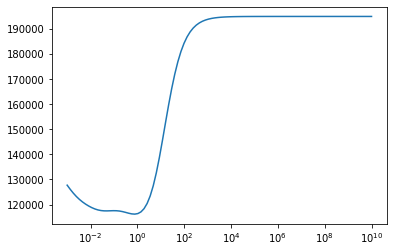

In [21]:
plt.plot(alphas, errors)
plt.xscale('log')
plt.show()

In [22]:
alphas[errors.argmin()]

0.7742636826811278

In [23]:
reg3 = linear_model.Ridge(alpha=0.572236765935022, normalize=True)
reg3.fit(X_train, Y_train)
Y_predict = reg3.predict(X_test)
score = metrics.mean_squared_error(Y_test, Y_predict)
score

116288.16233364365

**2.** Na osnovu informacija o kućama u Bostonu, izvršiti predikciju njihovih cena.

**Rešenje:** Biblioteka `sklearn` ima modul `datasets`, koji sadrži različite skupove podataka za analizu. Jedan od tih skupova podataka sadrži upravo informacije o kućama u Bostonu. Učitaćemo dataset, a zatim preko `DESCR` atributa ispisati osnovne informacije o njemu.

In [24]:
from sklearn import datasets
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Kreiraćemo vektor nezavisnih promenljivih kao *data frame* objekat (dobijen pomoću `data.data`), a vektor zavisnih pomoću `data.target`. Kao i u prethodnom slučaju, podatke ćemo podeliti na skup za treniranje i skup za testiranje.

In [25]:
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=1)

Kreiraćemo model linearne regresije i model grebene regresije sa parametrom $\alpha = 0.05$. Vrednost parametra je ručno odabrana.

In [26]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
y_predict = linreg.predict(x_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

20.698475744484373

In [27]:
rreg = linear_model.Ridge(alpha=0.05)
rreg.fit(x_train, y_train)
y_predict = rreg.predict(x_test)
score = metrics.mean_squared_error(y_test, y_predict)
score

20.647471761670815

U nastavku ćemo prikazati matricu korelacije svaka dva atributa iz skupa podataka. Ukoliko je vrednost bliska 1, za takve podatke se smatra da su visoko korelisani. Model se u nekim slučajevima može poboljšati, tako što se od neka dva visoko korelisana podatka izbaci jedan. Ovakav prikaz u `matplotlib.pyplot` paketu se naziva toplotna mapa (eng. *heatmap*).

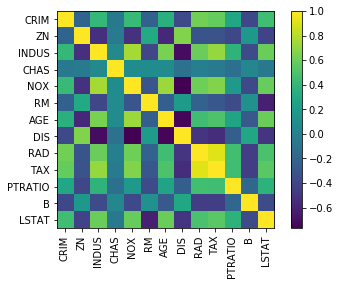

In [28]:
data_hm = pd.DataFrame(data.data)
plt.xticks(np.arange(13), list(data.feature_names), rotation='vertical')
plt.yticks(np.arange(13), list(data.feature_names))
corr = data_hm.corr()
plt.imshow(corr)
plt.colorbar()
plt.show()